In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm  # the normal probability distribution

In [2]:
# @title Plotting Functions

def plot_random_sample(x, y, figtitle = None):
  """ Plot the random sample between 0 and 1 for both the x and y axes.

    Args:
      x (ndarray): array of x coordinate values across the random sample
      y (ndarray): array of y coordinate values across the random sample
      figtitle (str): title of histogram plot (default is no title)

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  plt.xlim([-0.25, 1.25]) # set x and y axis range to be a bit less than 0 and greater than 1
  plt.ylim([-0.25, 1.25])
  plt.scatter(dataX, dataY)
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_random_walk(x, y, figtitle = None):
  """ Plots the random walk within the range 0 to 1 for both the x and y axes.

    Args:
      x (ndarray): array of steps in x direction
      y (ndarray): array of steps in y direction
      figtitle (str): title of histogram plot (default is no title)

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  plt.plot(x,y,'b-o', alpha = 0.5)
  plt.xlim(-0.1,1.1)
  plt.ylim(-0.1,1.1)
  ax.set_xlabel('x location')
  ax.set_ylabel('y location')
  plt.plot(x[0], y[0], 'go')
  plt.plot(x[-1], y[-1], 'ro')

  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_hist(data, xlabel, figtitle = None, num_bins = None):
  """ Plot the given data as a histogram.

    Args:
      data (ndarray): array with data to plot as histogram
      xlabel (str): label of x-axis
      figtitle (str): title of histogram plot (default is no title)
      num_bins (int): number of bins for histogram (default is 10)

    Returns:
      count (ndarray): number of samples in each histogram bin
      bins (ndarray): center of each histogram bin
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Count')
  if num_bins is not None:
    count, bins, _ = plt.hist(data, bins = num_bins)
  else:
    count, bins, _ = plt.hist(data, bins = np.arange(np.min(data)-.5, np.max(data)+.6)) # 10 bins default
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()
  return count, bins


def my_plot_single(x, px):
  """
  Plots normalized Gaussian distribution

    Args:
        x (numpy array of floats):     points at which the likelihood has been evaluated
        px (numpy array of floats):    normalized probabilities for prior evaluated at each `x`

    Returns:
        Nothing.
  """
  if px is None:
      px = np.zeros_like(x)

  fig, ax = plt.subplots()
  ax.plot(x, px, '-', color='C2', linewidth=2, label='Prior')
  ax.legend()
  ax.set_ylabel('Probability')
  ax.set_xlabel('Orientation (Degrees)')
  plt.show()


def plot_gaussian_samples_true(samples, xspace, mu, sigma, xlabel, ylabel):
  """ Plot a histogram of the data samples on the same plot as the gaussian
  distribution specified by the give mu and sigma values.

    Args:
      samples (ndarray): data samples for gaussian distribution
      xspace (ndarray): x values to sample from normal distribution
      mu (scalar): mean parameter of normal distribution
      sigma (scalar): variance parameter of normal distribution
      xlabel (str): the label of the x-axis of the histogram
      ylabel (str): the label of the y-axis of the histogram

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  # num_samples = samples.shape[0]

  count, bins, _ = plt.hist(samples, density=True)
  plt.plot(xspace, norm.pdf(xspace, mu, sigma),'r-')
  plt.show()

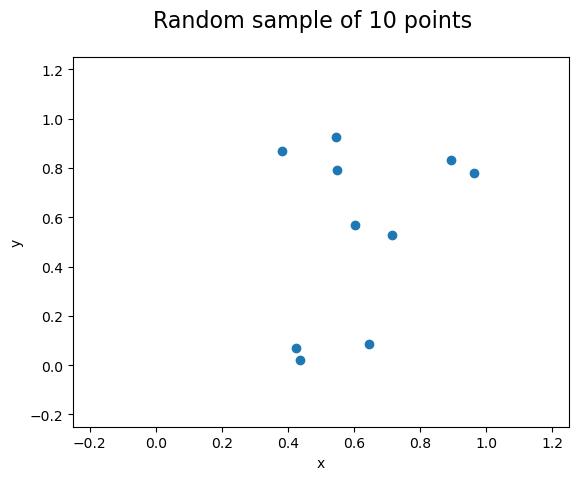

In [4]:
def generate_random_sample(num_points):
  """ Generate a random sample containing a desired number of points (num_points)
  in the range [0, 1] using a random number generator object.

  Args:
    num_points (int): number of points desired in random sample

  Returns:
    dataX, dataY (ndarray, ndarray): arrays of size (num_points,) containing x
    and y coordinates of sampled points

  """

  ###################################################################
  ## TODO for students: Draw the uniform numbers
  ## Fill out the following then remove
  ###################################################################

  # Generate desired number of points uniformly between 0 and 1 (using uniform) for
  #     both x and y
  dataX = np.random.uniform(0, 1, size = (num_points,))
  dataY = np.random.uniform(0, 1, size = (num_points,))

  return dataX, dataY

# Set a seed
np.random.seed(0)

# Set number of points to draw
num_points = 10

# Draw random points
dataX, dataY = generate_random_sample(num_points)

# Visualize
plot_random_sample(dataX, dataY, "Random sample of 10 points")

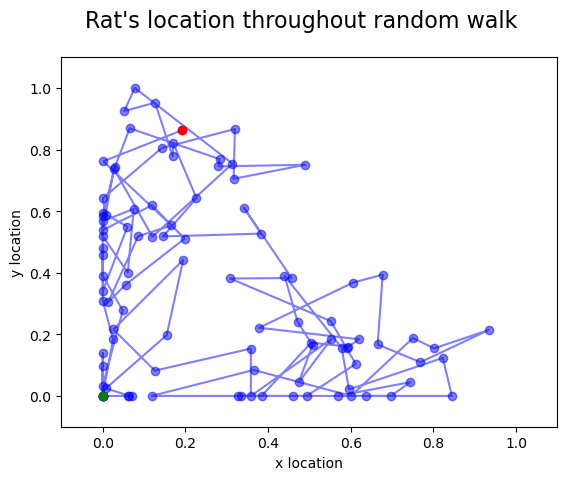

In [5]:
def generate_random_walk(num_steps, step_size):
  """ Generate the points of a random walk within a 1 X 1 box.

  Args:
    num_steps (int): number of steps in the random walk
    step_size (float): how much each random step size is weighted

  Returns:
    x, y (ndarray, ndarray): the (x, y) locations reached at each time step of the walk

  """
  x = np.zeros(num_steps + 1)
  y = np.zeros(num_steps + 1)

  ###################################################################
  ## TODO for students: Collect random step values with function from before
  ## Fill out the following then remove
  ###################################################################

  # Generate the uniformly random x, y steps for the walk
  random_x_steps, random_y_steps = generate_random_sample(num_steps)

  # Take steps according to the randomly sampled steps above
  for step in range(num_steps):

    # take a random step in x and y. We remove 0.5 to make it centered around 0
    x[step + 1] = x[step] + (random_x_steps[step] - 0.5)*step_size
    y[step + 1] = y[step] + (random_y_steps[step] - 0.5)*step_size

    # restrict to be within the 1 x 1 unit box
    x[step + 1]= min(max(x[step + 1], 0), 1)
    y[step + 1]= min(max(y[step + 1], 0), 1)

  return x, y

# Set a random seed
np.random.seed(2)

# Select parameters
num_steps = 100   # number of steps in random walk
step_size = 0.5   # size of each step

# Generate the random walk
x, y = generate_random_walk(num_steps, step_size)

# Visualize
plot_random_walk(x, y, "Rat's location throughout random walk")

In [6]:
# Set random seed
np.random.seed(0)

# Draw 5 samples from a Poisson distribution with lambda = 4
sampled_spike_counts = np.random.poisson(lam = (4,), size = (5,))

# Print the counts
print("The samples drawn from the Poisson distribution are " +
          str(sampled_spike_counts))

The samples drawn from the Poisson distribution are [6 7 1 8 4]


In [ ]:
def my_gaussian(x_points, mu, sigma):
  """ Returns normalized Gaussian estimated at points `x_points`, with
  parameters: mean `mu` and standard deviation `sigma`

  Args:
      x_points (ndarray of floats): points at which the gaussian is evaluated
      mu (scalar): mean of the Gaussian
      sigma (scalar): standard deviation of the gaussian

  Returns:
      (numpy array of floats) : normalized Gaussian evaluated at `x`
  """

  ###################################################################
  ## TODO for students: Implement the formula for a Gaussian
  ## Add code to calculate the gaussian px as a function of mu and sigma,
  ## for every x in x_points
  ## Function Hints: exp -> np.exp()
  ##                 power -> z**2
  ##
  ## Fill out the following then remove
  ###################################################################
  px = 1/(2*np.pi*sigma**2)**1/2 *np.exp(-(x_points-mu)**2/(2*sigma**2))

  # as we are doing numerical integration we have to remember to normalise
  # taking into account the stepsize (0.1)
  px = px/(0.1*sum(px))
  return px

x = np.arange(-8, 9, 0.1)

# Generate Gaussian
px = my_gaussian(x, -1, 1)

# Visualize
my_plot_single(x, px)